# Jetrails problem

Unicorn Investors wants to make an investment in a new form of transportation - JetRail. JetRail uses Jet propulsion technology to run rails and move people at a high speed! The investment would only make sense, if they can get more than 1 Million monthly users with in next 18 months. In order to help Unicorn Ventures in their decision, you need to forecast the traffic on JetRail for the next 7 months. You are provided with traffic data of JetRail since inception in the test file.

In [1]:
import pandas as pd
import numpy as np
from pandas import datetime
import matplotlib.pyplot as plt
%matplotlib inline

import warnings # to ignore the warnings
warnings.filterwarnings('ignore')

### Hypothesis Generation

Hypothesis Generation is the process of listing out all the possible factors that can affect the outcome.

Hypothesis generation helps us to point out the factors which might affect our dependent variable. 

There will be an increase in the traffic as the years pass by.
as - Population has a general upward trend with time, so I can expect more people to travel by JetRail and 
Also, generally companies expand their businesses over time leading to more customers travelling through JetRail.

The traffic will be high from May to October.
as - Tourist visits generally increases during this time perion.

Traffic on weekdays will be more as compared to weekends/holidays.
as - People will go to office on weekdays and hence the traffic will be more

Traffic during the peak hours will be high.
as - People will travel to work, college.

In [2]:

def parser(x):
    return datetime.strptime(x,'%d-%m-%Y %H:%M')

train=pd.read_csv("Train_SU63ISt.csv", parse_dates= ['Datetime'], date_parser=parser) 
test=pd.read_csv("Test_0qrQsBZ.csv", parse_dates= ['Datetime'], date_parser=parser )

train_original= train.copy()
test_original= test.copy()

In [3]:
test.shape

(5112, 2)

In [4]:
train.head()

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2


In [5]:
train.dtypes

ID                   int64
Datetime    datetime64[ns]
Count                int64
dtype: object

In [6]:
test.head()

,ID,Datetime
0,18288,2014-09-26 00:00:00
1,18289,2014-09-26 01:00:00
2,18290,2014-09-26 02:00:00
3,18291,2014-09-26 03:00:00
4,18292,2014-09-26 04:00:00


In [7]:
test.dtypes

ID                   int64
Datetime    datetime64[ns]
dtype: object

In [8]:
for df in (train,test,test_original,train_original):
    df['year']= df.Datetime.dt.year
    df['month']= df.Datetime.dt.month
    df['day']= df.Datetime.dt.day
    df['hour']= df.Datetime.dt.hour
    df['dow']= df.Datetime.dt.dayofweek
    df['weekend']= df['dow'].apply(lambda x: 1 if x==5 or x==6 else 0)

We made some hypothesis for the effect of weekday, day of week , hour, day, month and year on the passenger count. So, let’s extract the year, month, day and hour from the Datetime to validate our hypothesis.

In [9]:
train.head()

,ID,Datetime,Count,year,month,day,hour,dow,weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [10]:
train.drop(['ID'], axis=1, inplace=True)

In [11]:
train.set_index('Datetime', inplace=True)
test.set_index('Datetime', inplace=True)

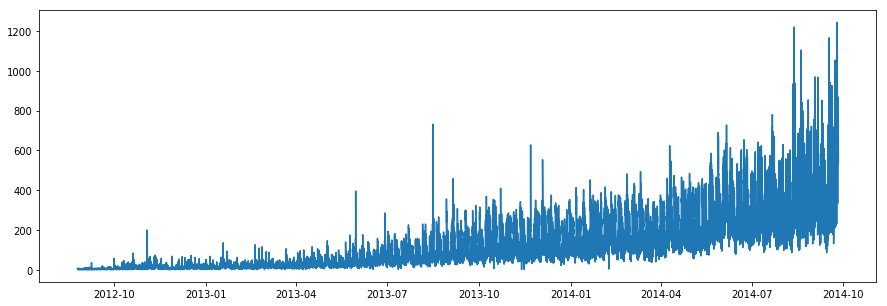

In [13]:
plt.figure(figsize= (15,5))
plt.plot(train.Count)

We can see trend in data as time is increasing

### EDA

Now we will verify and explore data based on our hypothesis.

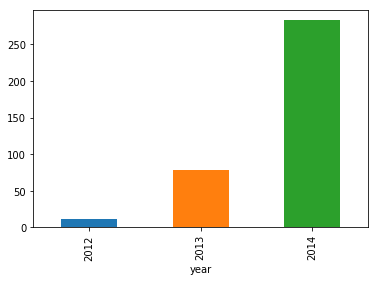

In [14]:
#increase in the traffic as the years pass by.

train.groupby('year')['Count'].mean().plot(kind='bar')

We can see by increasing year , count is increasing.

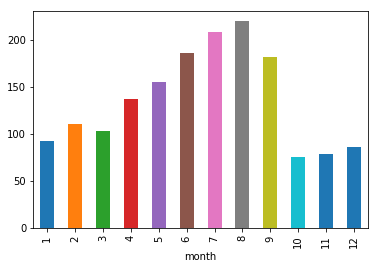

In [15]:
# Population will be more on train in may to oct
train.groupby('month')['Count'].mean().plot(kind='bar')

This hypothesis gets wrong for us as in last 3 month count is less but lets do it with year and month combination.

Text(0.5, 0, "['year', 'month']")

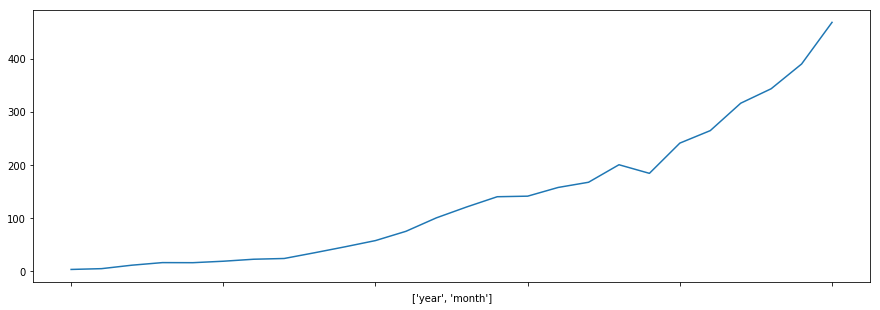

In [16]:
plt.figure(figsize=(15,5))
train.groupby(['year','month'])['Count'].mean().plot()
plt.xlabel(['year','month'])


In last three month it is decreasing coz we dont have data for 3 months in 2014, so for this we can see increasing trend.

In [17]:
train.loc[train['year']==2014, 'month'].tail()

Datetime
2014-09-25 19:00:00    9
2014-09-25 20:00:00    9
2014-09-25 21:00:00    9
2014-09-25 22:00:00    9
2014-09-25 23:00:00    9
Name: month, dtype: int64

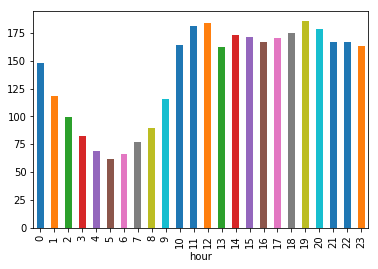

In [18]:
# Traffic will be more in peak hours.
train.groupby('hour')['Count'].mean().plot(kind='bar')

so we can see from 7 am its increasing and 10 hr its decreasing, verifying our hypothesis.

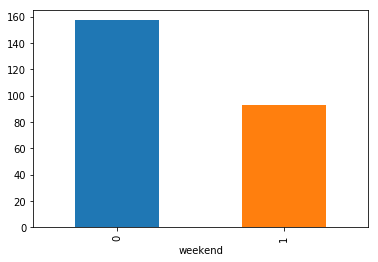

In [19]:
# weekdays will have more traffic as compared to weekends
train.groupby('weekend')['Count'].mean().plot(kind='bar')

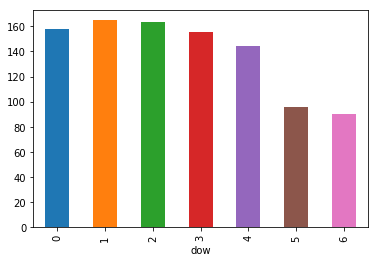

In [20]:
train.groupby('dow')['Count'].mean().plot(kind='bar')

0 is monday and 6 is sunday.

so by both graph we can verify that weekday has more traffic than weekends.

In [21]:
train.columns

Index(['Count', 'year', 'month', 'day', 'hour', 'dow', 'weekend'], dtype='object')

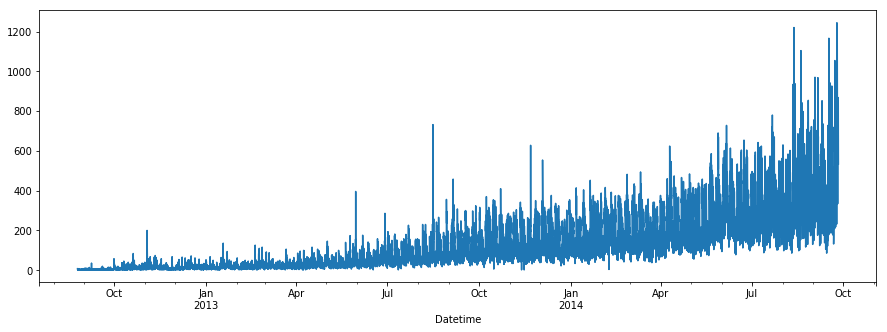

In [22]:
train.Count.plot(figsize=(15,5))

As we can see traffic based on hourly freq has very much noise, so we try to resample it to daily, monthly, weekly,  yearly

In [23]:
# Hourly time series 
yearly = train.resample('Y').mean() 
# Converting to daily mean 
daily = train.resample('D').mean() 
# Converting to weekly mean 
weekly = train.resample('W').mean() 
# Converting to monthly mean 
monthly = train.resample('M').mean()

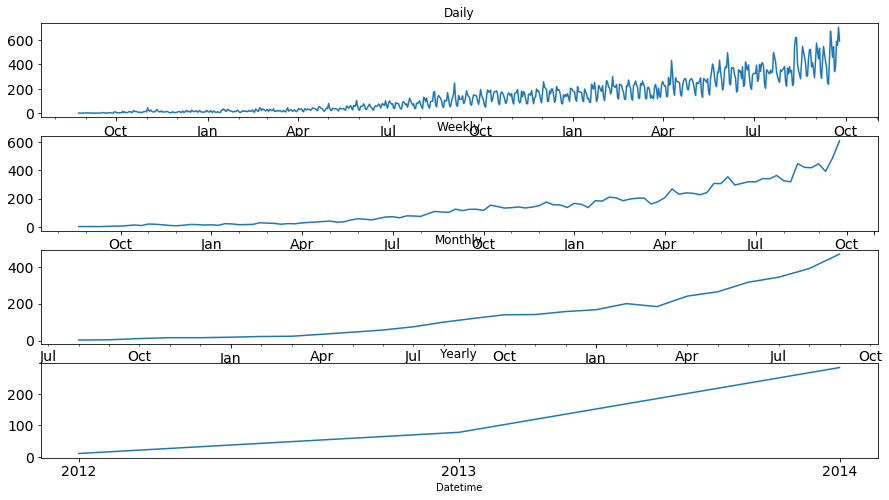

In [24]:
fig, axs = plt.subplots(4,1) 

daily.Count.plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[0])
weekly.Count.plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[1])
monthly.Count.plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[2]) 
yearly.Count.plot(figsize=(15,8), title= 'Yearly', fontsize=14, ax=axs[3])

plt.show()

we can see data is getting more aggregated as we move from hourly to daily to monthly to yearly

So we will take daily frequency to get to our prediction, so we are using resampling to change freq from hourly to monthly, but when you will be predicting test values then we have to convert these daily to hourly frequency, so i will do it with daily and hourly both.

In [25]:
# def parser(x):
#     return datetime.strptime(x,'%d-%m-%Y %H:%M')
# train=pd.read_csv("Train_SU63ISt.csv", parse_dates= ['Datetime'], date_parser=parser) 
# test=pd.read_csv("Test_0qrQsBZ.csv", parse_dates= ['Datetime'], date_parser=parser )

# train.set_index('Datetime',inplace=True)
# test.set_index('Datetime',inplace=True)

train = train.resample('D').mean()
test= test.resample('D').mean()

In [26]:
test.shape

(213, 7)

train=pd.read_csv("Train_SU63ISt.csv") 
test=pd.read_csv("Test_0qrQsBZ.csv")

train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
train.index = train.Timestamp

train.head()

train = train.resample('D').mean()

Now dividing the data for training and validation, as we have only one variabl we can divide it on basis of date.

In [27]:
training= train.loc['2012-08':'2014-05']
validation= train.loc['2014-06':'2014-09']

In [28]:
training.size

4515

In [29]:
validation.size

819

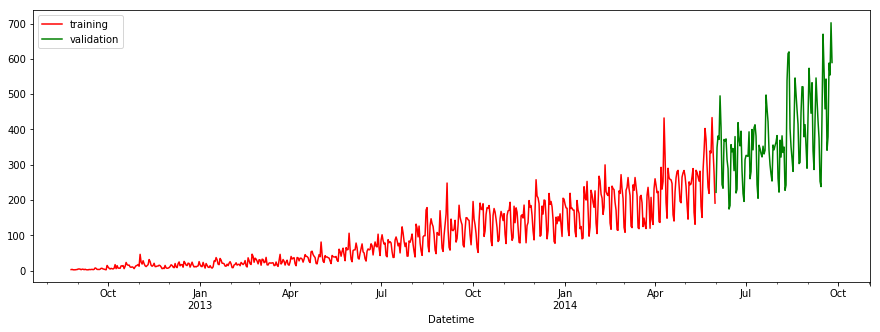

In [30]:
plt.figure(figsize=(15,5))
training.Count.plot(color='red', label= 'training')
validation.Count.plot(color='green', label= 'validation')
plt.legend()
plt.show()

Here the red part represents the train data and the green part represents the validation data.

We will predict the traffic for the validation part and then visualize how accurate our predictions are. Finally we will make predictions for the test dataset.

# Modelling Techniques for TSA

#### Naive Approach

In this forecasting technique, we assume that the next expected point is equal to the last observed point. So we can expect a straight horizontal line as the prediction.

In [31]:
# dd= np.asarray(training.Count) 
y_hat = validation.copy() 
y_hat['naive'] = training.Count[len(training.Count)-1] # assigning last value of training set to all values in validation set

In [32]:
training.tail(1)

,Count,year,month,day,hour,dow,weekend
Datetime,,,,,,,
2014-05-31,191.333333,2014.0,5.0,31.0,11.5,5.0,1.0


In [33]:
y_hat.head()

,Count,year,month,day,hour,dow,weekend,naive
Datetime,,,,,,,,
2014-06-01,222.000000,2014.0,6.0,1.0,11.5,6.0,1.0,191.333333
2014-06-02,349.166667,2014.0,6.0,2.0,11.5,0.0,0.0,191.333333
2014-06-03,381.750000,2014.0,6.0,3.0,11.5,1.0,0.0,191.333333
2014-06-04,371.916667,2014.0,6.0,4.0,11.5,2.0,0.0,191.333333
2014-06-05,495.250000,2014.0,6.0,5.0,11.5,3.0,0.0,191.333333


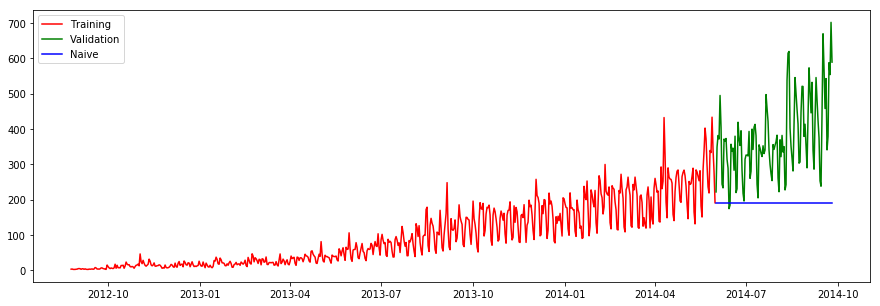

In [34]:
plt.figure(figsize= (15,5))
plt.plot(training.Count, 'r', label= 'Training')
plt.plot(validation.Count, 'g', label= 'Validation')
plt.plot(y_hat.naive, 'b', label= 'Naive')
plt.legend(loc='best')
plt.show()

In [35]:
from sklearn.metrics import mean_squared_error
rmse= np.sqrt(mean_squared_error(validation.Count,y_hat.naive))
rmse

213.67934457545402

#### Moving average

In this technique we will take the average of the passenger counts for last few time periods only.

we will consider for 10,20,50 last values

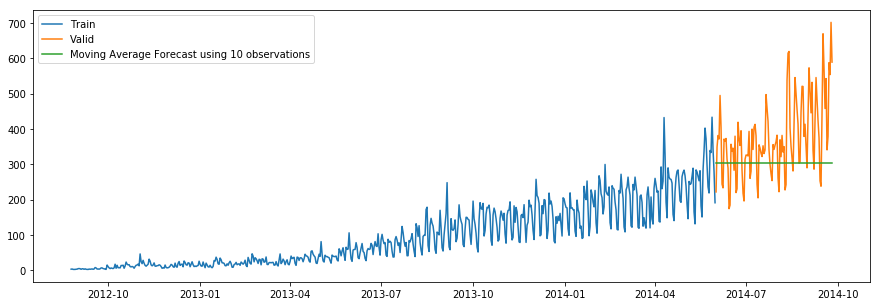

129.62278554302316

In [36]:
y_hat_avg = validation.copy() 
y_hat_avg['moving_avg_forecast'] = training['Count'].rolling(10).mean().iloc[-1] # average of last 10 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(training['Count'], label='Train') 
plt.plot(validation['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 10 observations') 
plt.legend(loc='best') 
plt.show()
rmse= np.sqrt(mean_squared_error(validation.Count,y_hat_avg['moving_avg_forecast']))
rmse

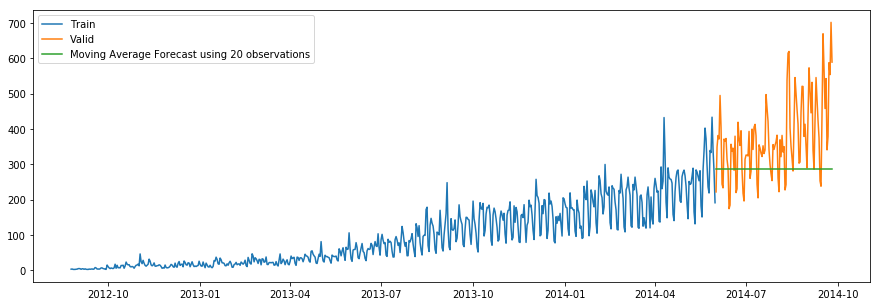

139.08836003244812

In [37]:
y_hat_avg = validation.copy() 
y_hat_avg['moving_avg_forecast'] = training['Count'].rolling(20).mean().iloc[-1] # average of last 10 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(training['Count'], label='Train') 
plt.plot(validation['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 20 observations') 
plt.legend(loc='best') 
plt.show()
rmse= np.sqrt(mean_squared_error(validation.Count,y_hat_avg['moving_avg_forecast']))
rmse

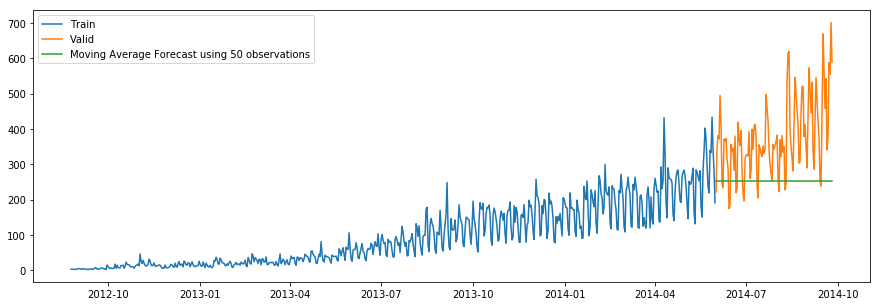

163.30309454351485

In [38]:
y_hat_avg = validation.copy() 
y_hat_avg['moving_avg_forecast'] = training['Count'].rolling(50).mean().iloc[-1] # average of last 10 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(training['Count'], label='Train') 
plt.plot(validation['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 50 observations') 
plt.legend(loc='best') 
plt.show()
rmse= np.sqrt(mean_squared_error(validation.Count,y_hat_avg['moving_avg_forecast']))
rmse

So you will notice, with 50 values rmse is less.

#### Simple Exponential Smoothening

In this technique, we assign larger weights to more recent observations than to observations from the distant past.

The weights decrease exponentially as observations come from further in the past, the smallest weights are associated with the oldest observations.

Single Exponential Smoothing, SES for short, also called Simple Exponential Smoothing, is a time series forecasting method for univariate data without a trend or seasonality.

It requires a single parameter, called alpha (a), also called the smoothing factor or smoothing coefficient.

This parameter controls the rate at which the influence of the observations at prior time steps decay exponentially. Alpha is often set to a value between 0 and 1. Large values mean that the model pays attention mainly to the most recent past observations, whereas smaller values mean more of the history is taken into account when making a prediction

In [39]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg= validation.copy()
fit= SimpleExpSmoothing(training.Count).fit(smoothing_level=0.5, optimized=False)
y_hat_avg['ses']= fit.forecast(len(validation.Count))

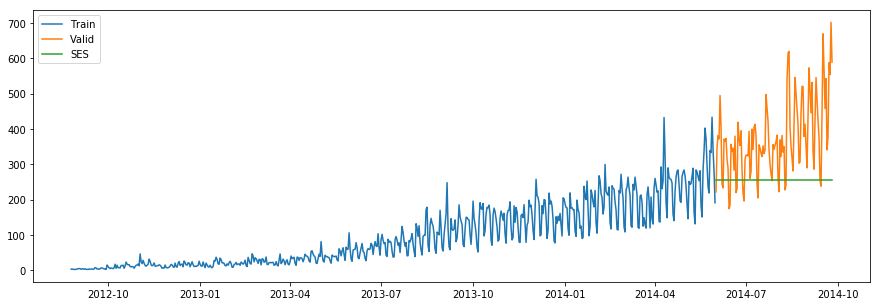

161.97307798123828

In [40]:
plt.figure(figsize=(15,5))
plt.plot(training['Count'], label='Train') 
plt.plot(validation['Count'], label='Valid') 
plt.plot(y_hat_avg['ses'], label='SES') 
plt.legend(loc='best') 
plt.show()
rmse= np.sqrt(mean_squared_error(validation.Count,y_hat_avg['ses']))
rmse

#### Holt’s Linear Trend Model


It is an extension of simple exponential smoothing to allow forecasting of data with a trend.

This method takes into account the trend of the dataset. The forecast function in this method is a function of level and trend.

We can decompose the time series in four parts.

1. Observed, which is the original time series.

2. Trend, which shows the trend in the time series, i.e., increasing or decreasing behaviour of the time series.

3. Seasonal, which tells us about the seasonality in the time series.

4. Residual, which is obtained by removing any trend or seasonality in the time series.

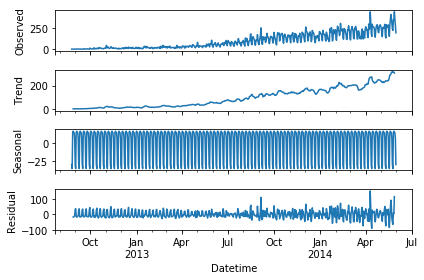

In [41]:
from statsmodels.tsa.api import seasonal_decompose, adfuller
seasonal_decompose(training.Count).plot() 
# result = adfuller(training.Count) # adfuller test is to check the statiinarity.
plt.show()
# result

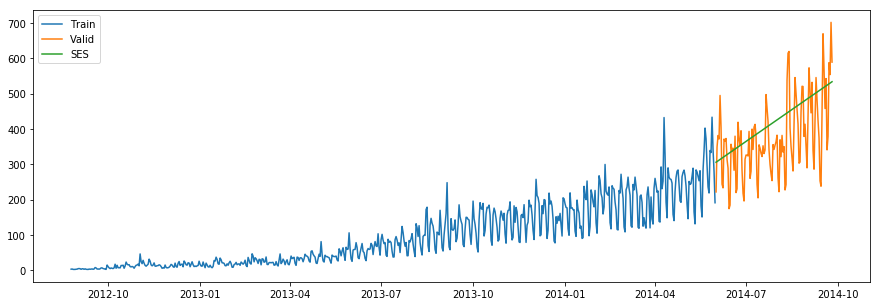

104.46765267293395

In [42]:
y_hat_avg= validation.copy()
fit= Holt(training.Count).fit(smoothing_level=0.2, smoothing_slope=0.05)
y_hat_avg['holt_linear']= fit.forecast(len(validation.Count))
plt.figure(figsize=(15,5))
plt.plot(training['Count'], label='Train') 
plt.plot(validation['Count'], label='Valid') 
plt.plot(y_hat_avg['holt_linear'], label='SES') 
plt.legend(loc='best') 
plt.show()
rmse= np.sqrt(mean_squared_error(validation.Count,y_hat_avg['holt_linear']))
rmse

We can see an inclined line here as the model has taken into consideration the trend of the time series.

In [43]:
test.shape

(213, 7)

In [44]:
#predicting values for Test data, i am only getting values till 2014-12-30
test['h_lin']= fit.predict(start="2014-9-26", end="2015-4-26")
test.head()

,ID,year,month,day,hour,dow,weekend,h_lin
Datetime,,,,,,,,
2014-09-26,18299.5,2014.0,9.0,26.0,11.5,4.0,0.0,536.136349
2014-09-27,18323.5,2014.0,9.0,27.0,11.5,5.0,1.0,538.102292
2014-09-28,18347.5,2014.0,9.0,28.0,11.5,6.0,1.0,540.068234
2014-09-29,18371.5,2014.0,9.0,29.0,11.5,0.0,0.0,542.034176
2014-09-30,18395.5,2014.0,9.0,30.0,11.5,1.0,0.0,544.000118


In [45]:
# # Let’s drop all other features from the submission file and keep ID and Count only.
# submission=test.drop(['month', 'day', 'year','hour', 'dow','weekend'],axis=1) 

# # Converting the final submission to csv format 
# pd.DataFrame(submission, columns=['ID','h_lin']).to_csv('Holt linear.csv')
# pd.read_csv('Holt linear.csv').iloc[2300:3000,:]

Remember this is the daily predictions. We have to convert these predictions to hourly basis. * To do so we will first calculate the ratio of passenger count for each hour of every day. * Then we will find the average ratio of passenger count for every hour and we will get 24 ratios. * Then to calculate the hourly predictions we will multiply the daily prediction with the hourly ratio.

In [48]:
# Calculating the hourly ratio of count
train_original['ratio']=train_original['Count']/train_original['Count'].sum() 

In [50]:
# Mapping the hourly ratio with corresponding hours
temp=train_original.groupby(['hour'])['ratio'].sum() 
temp2= pd.DataFrame(temp, columns=['ratio']).reset_index()

In [53]:
# Merge Test and test_original on day, month and year.
# As Test is in days freq and original is on hour, it will map days with their respective hours freq
merge=pd.merge(test, test_original, on=('day','month', 'year'), how='left') 


In [54]:
#Renaming and deleteing duplicates columns
merge['hour']=merge['hour_y'] 
merge=merge.drop(['year', 'month','hour_x','hour_y'], axis=1)

In [60]:
# mapping hourly ratio with hourly freq data
prediction=pd.merge(merge, temp2, on='hour', how='left') 


In [61]:

# Converting the ratio to the original scale 

prediction['Count']=prediction['h_lin']*(prediction['ratio']*24)
prediction['ID']=prediction['ID_y']

In [62]:
# Let’s drop all other features from the submission file and keep ID and Count only.
submission=prediction.drop(['ID_x', 'day', 'ID_y','h_lin','hour', 'ratio'],axis=1).reset_index() 



In [64]:
# Converting the final submission to csv format 
pd.DataFrame(submission, columns=['ID','Count']).to_csv('Holt linear.csv', index=False)


#getting values til 2014-12-30
pd.read_csv('Holt linear.csv').iloc[2300:2315,:]

,ID,Count
2300,20588,927.428242
2301,20589,865.656131
2302,20590,868.796623
2303,20591,848.260536
2304,20592,770.445054
2305,20593,614.855461
2306,20594,520.357100
2307,20595,429.952481
2308,20596,361.892303
2309,20597,323.953306


#### Holts Winter Model

Datasets which show a similar set of pattern after fixed intervals of a time period suffer from seasonality.

The above discussed models don’t take into account the seasonality of the dataset while forecasting. Hence we need a method that takes into account both trend and seasonality to forecast future prices.

One such algorithm that we can use in such a scenario is Holt’s Winter method. The idea behind Holt’s Winter is to apply exponential smoothing to the seasonal components in addition to level and trend.

In [65]:
from statsmodels.tsa.api import ExponentialSmoothing
y_hat_avg= validation.copy()
fit= ExponentialSmoothing(training.Count, seasonal_periods=7, trend='add', seasonal='add').fit()
y_hat_avg['holt_winter']= fit.forecast(len(validation.Count))

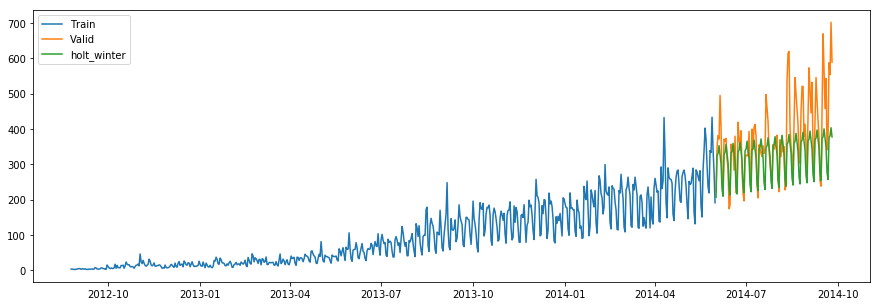

92.48151320903337

In [66]:
plt.figure(figsize=(15,5))
plt.plot(training['Count'], label='Train') 
plt.plot(validation['Count'], label='Valid') 
plt.plot(y_hat_avg['holt_winter'], label='holt_winter') 
plt.legend(loc='best') 
plt.show()
rmse= np.sqrt(mean_squared_error(validation.Count,y_hat_avg['holt_winter']))
rmse

In [69]:
#predicting values for Test data, i am only getting values till 2014-12-30
test['h_win']= fit.predict(start="2014-9-26", end="2015-4-26")
test.head()

,ID,year,month,day,hour,dow,weekend,h_lin,h_win
Datetime,,,,,,,,,
2014-09-26,18299.5,2014.0,9.0,26.0,11.5,4.0,0.0,536.136349,352.339293
2014-09-27,18323.5,2014.0,9.0,27.0,11.5,5.0,1.0,538.102292,280.267473
2014-09-28,18347.5,2014.0,9.0,28.0,11.5,6.0,1.0,540.068234,260.285710
2014-09-29,18371.5,2014.0,9.0,29.0,11.5,0.0,0.0,542.034176,379.551248
2014-09-30,18395.5,2014.0,9.0,30.0,11.5,1.0,0.0,544.000118,384.204919


In [70]:
# Calculating the hourly ratio of count
train_original['ratio']=train_original['Count']/train_original['Count'].sum() 

# Mapping the hourly ratio with corresponding hours
temp=train_original.groupby(['hour'])['ratio'].sum() 
temp2= pd.DataFrame(temp, columns=['ratio']).reset_index()


# Merge Test and test_original on day, month and year.
# As Test is in days freq and original is on hour, it will mappur days with their respective hours freq
merge=pd.merge(test, test_original, on=('day','month', 'year'), how='left') 

#Renaming and deleteing duplicates columns
merge['hour']=merge['hour_y'] 
merge=merge.drop(['year', 'month','hour_x','hour_y'], axis=1)

# mapping hourly ratio with hourly freq data
prediction=pd.merge(merge, temp2, on='hour', how='left') 


# Converting the ratio to the original scale 

prediction['Count']=prediction['h_win']*prediction['ratio']*24
prediction['ID']=prediction['ID_y']

# Let’s drop all other features from the submission file and keep ID and Count only.
submission=prediction.drop(['ID_x', 'day', 'ID_y','h_win','hour', 'ratio'],axis=1).reset_index() 

# Converting the final submission to csv format 
pd.DataFrame(submission, columns=['ID','Count']).to_csv('Holt Winter.csv', index=False)


#getting values til 2014-12-30
pd.read_csv('Holt Winter.csv').iloc[2300:2315,:]

,ID,Count
2300,20588,545.611493
2301,20589,509.270597
2302,20590,511.118166
2303,20591,499.036666
2304,20592,476.207862
2305,20593,380.038788
2306,20594,321.629869
2307,20595,265.751270
2308,20596,223.683647
2309,20597,200.233761


# Arima (Auto regressive integrated moving average model)

ARIMA stands for Auto Regression Integrated Moving Average. It is specified by three ordered parameters (p,d,q).

p is the order of the autoregressive model(number of time lags)

d is the degree of differencing(number of times the data have had past values subtracted)

q is the order of moving average model. We will discuss more about these parameters in next section.

The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation


#### Stationary Check

There are three basic criterion for a series to be classified as stationary series :

The mean of the time series should not be a function of time. It should be constant.

The variance of the time series should not be a function of time.

THe covariance of the ith term and the (i+m)th term should not be a function of time.

Stationary means mean, variance and covariance is constant over periods.

We make the series stationary to make the variables independent. Variables can be dependent in various ways, but can only be independent in one way. So, we will get more information when they are independent. Hence the time series must be stationary.

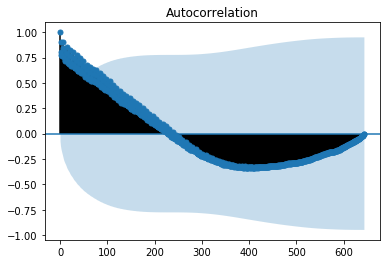

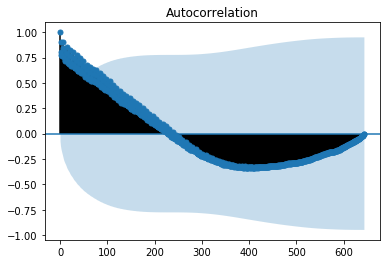

In [71]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(training.Count)

As you can see data is not stationary, it has a linear increasing trend.

Stationary means mean, variance and covariance is constant over periods.

 check through acf graph where it shows auto correlation is linearly decreasing with lag .


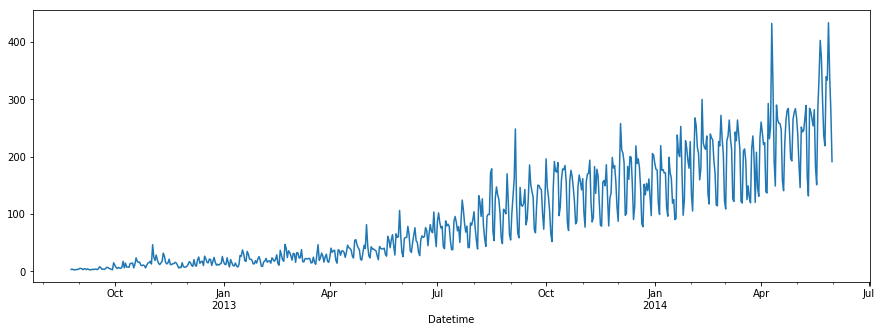

In [72]:
training.Count.plot(figsize=(15,5))
#shows the increasing trend

In [74]:
split = len(training.Count) // 2
X1, X2 = training.iloc[0:split,0], training.iloc[split:,0]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=26.202381, mean2=165.700464
variance1=438.872076, variance2=5192.112575


we can see the mean and variance look very different for each section and is increasing showing inreasing trend.

We have a non-stationary time series.

This is a quick and dirty method that may be easily fooled.

#### Dickey Fuller Statistical Test

It uses an autoregressive model and optimizes an information criterion across multiple different lag values.

The intuition behind this test is that it determines how strongly a time series is defined by a trend.

The null hypothesis of the test is that time series is not stationary (has some time-dependent structure).

The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

We interpret this result using the Test Statistics and critical value. If the Test Statistics is smaller than critical value, it suggests we reject the null hypothesis (stationary), otherwise a greater Test Statistics suggests we accept the null hypothesis (non-stationary)

#### KPSS (Kwiatkowski-Phillips-Schmidt-Shin) Test

KPSS is another test for checking the stationarity of a time series (slightly less popular than the Dickey Fuller test). The null and alternate hypothesis for the KPSS test are opposite that of the ADF test, which often creates confusion.

The authors of the KPSS test have defined the null hypothesis as the process is trend stationary, to an alternate hypothesis of a unit root series. We will understand the trend stationarity in detail in the next section. For now, let’s focus on the implementation and see the results of the KPSS test.

Null Hypothesis: The process is trend stationary.

Alternate Hypothesis: The series has a unit root (series is not stationary).

We interpret this result using the Test Statistics and critical value. 
If the test statistic is greater than the critical value, we reject the null hypothesis (series is not stationary). If the test statistic is less than the critical value, if fail to reject the null hypothesis (series is stationary). 



In [87]:
from statsmodels.tsa.api import adfuller, kpss

def check_stationarity(timeseries):
    
    rolmean= timeseries.rolling(24).mean() # 24 hours a day
    rolstd= timeseries.rolling(24).std()
    
    #plotting Graph
    plt.figure(figsize=(15,5))
    plt.plot(timeseries,'red', label= 'original')
    plt.plot(rolmean,'green', label= 'Rolling Mean')
    plt.plot(rolstd,'black', label= 'Rolling Standard Deviation')
    plt.legend(loc='best')
    plt.title('Rol Mean and Rol STD')
    plt.show
    
    #Fuller test
    stat= adfuller(timeseries, autolag='AIC')  # adfuller test is to check the stationarity.
    
    dfoutput = pd.Series(stat[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in stat[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    

def kpss_test(timeseries):     #define KPSS
    kpsstest = kpss(timeseries)
    
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)




Test Statistic                    -4.456561
p-value                            0.000235
#Lags Used                        45.000000
Number of Observations Used    18242.000000
Critical Value (1%)               -3.430709
Critical Value (5%)               -2.861698
Critical Value (10%)              -2.566854
dtype: float64


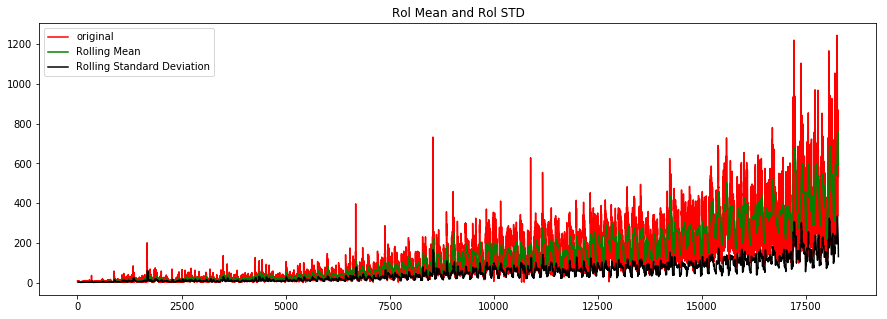

In [88]:
check_stationarity(train_original.Count)

The statistics shows that the time series is stationary as Test Statistic < Critical value but we can see an increasing trend in the data. So, firstly we will try to make the data more stationary. For doing so, we need to remove the trend and seasonality from the data.

In [89]:
kpss_test(train_original.Count)

Test Statistic           32.377296
p-value                   0.010000
Lags Used                45.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


the test statistic is greater than the critical value,series is not stationary. 

Test Statistic                   1.459335
p-value                          0.997368
#Lags Used                      20.000000
Number of Observations Used    624.000000
Critical Value (1%)             -3.440873
Critical Value (5%)             -2.866183
Critical Value (10%)            -2.569243
dtype: float64


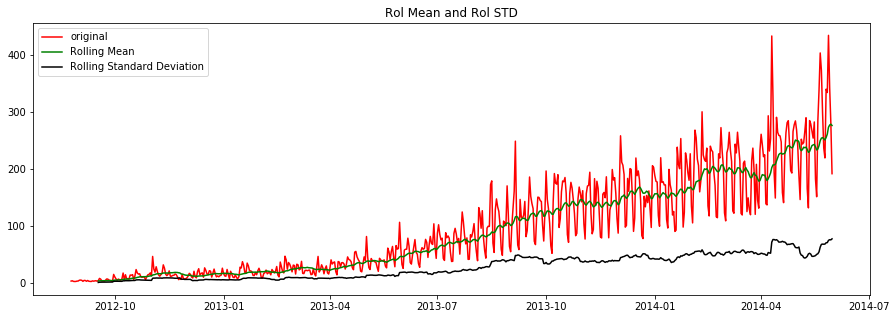

In [91]:
check_stationarity(training.Count)

We see an increasing trend in the data so we can apply transformation which penalizes higher values more than smaller ones, for example log transformation.

We will take rolling average here to remove the trend. We will take the window size of 24 based on the fact that each day has 24 hours.

In [92]:
kpss_test(training.Count)

Test Statistic            3.042464
p-value                   0.010000
Lags Used                20.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


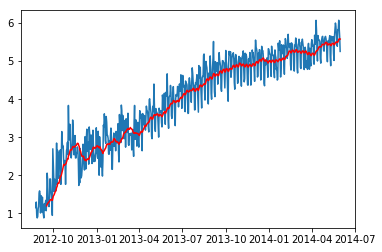

In [93]:
Train_log = np.log(training['Count']) 
valid_log = np.log(validation['Count'])
moving_avg = Train_log.rolling(24).mean() 
plt.plot(Train_log) 
plt.plot(moving_avg, color = 'red') 
plt.show()

Test Statistic                -6.786711e+00
p-value                        2.421788e-09
#Lags Used                     1.600000e+01
Number of Observations Used    6.050000e+02
Critical Value (1%)           -3.441205e+00
Critical Value (5%)           -2.866329e+00
Critical Value (10%)          -2.569320e+00
dtype: float64


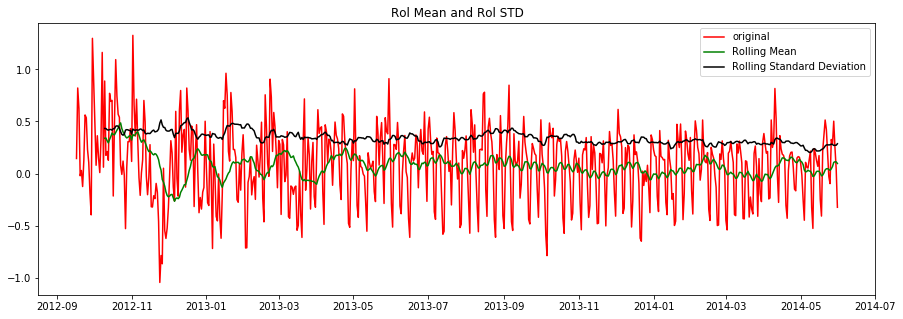

In [94]:
# So we can observe an increasing trend. Now we will remove this increasing trend to make our time series stationary.

train_log_moving_avg_diff = Train_log - moving_avg

# Since we took the average of 24 values, rolling mean is not defined for the first 23 values.
# So let’s drop those null values.

train_log_moving_avg_diff.dropna(inplace = True)
check_stationarity(train_log_moving_avg_diff)


In [95]:
kpss_test(train_log_moving_avg_diff)

Test Statistic            0.320824
p-value                   0.100000
Lags Used                19.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [96]:
# Taking the difference of 1 or integrate of order 1
# Differencing can help to make the series stable and eliminate the trend.
Train_log_diff = Train_log.diff(periods=1)

Test Statistic                -8.113746e+00
p-value                        1.206393e-12
#Lags Used                     1.900000e+01
Number of Observations Used    6.240000e+02
Critical Value (1%)           -3.440873e+00
Critical Value (5%)           -2.866183e+00
Critical Value (10%)          -2.569243e+00
dtype: float64


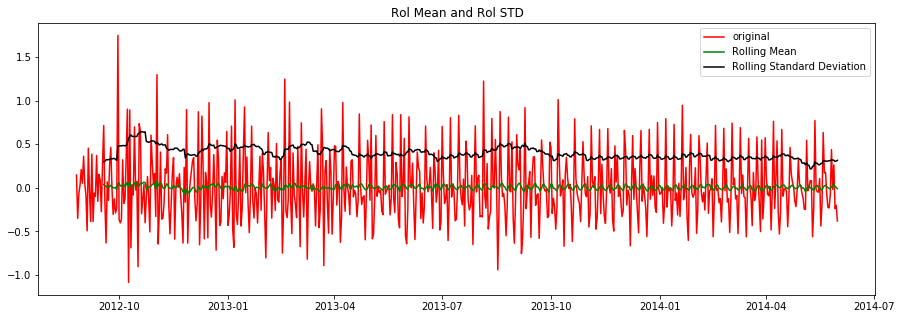

In [97]:
check_stationarity(Train_log_diff.dropna())

In [98]:
kpss_test(Train_log_diff.dropna())

Test Statistic            0.141368
p-value                   0.100000
Lags Used                20.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [99]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

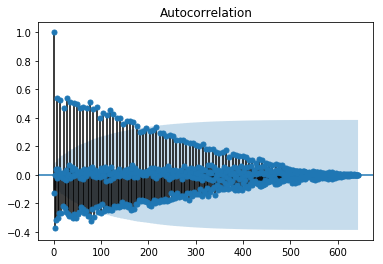

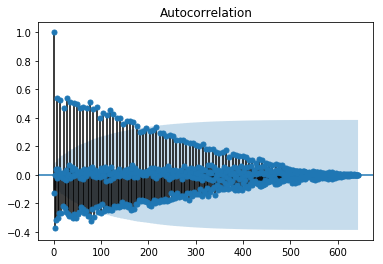

In [100]:
plot_acf(Train_log_diff.dropna())

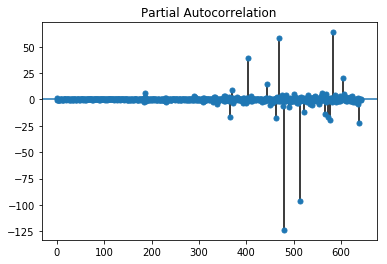

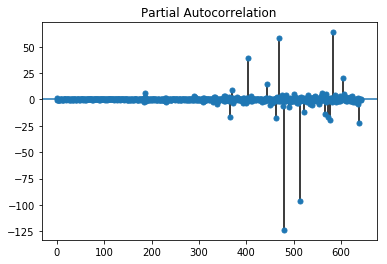

In [101]:
plot_pacf(Train_log_diff.dropna())

## Removing Seasonality

By seasonality, we mean periodic fluctuations. A seasonal pattern exists when a series is influenced by seasonal factors (e.g., the quarter of the year, the month, or day of the week).

Seasonality is always of a fixed and known period.

We will use seasonal decompose to decompose the time series into trend, seasonality and residuals.

In [102]:
from statsmodels.tsa.seasonal import seasonal_decompose

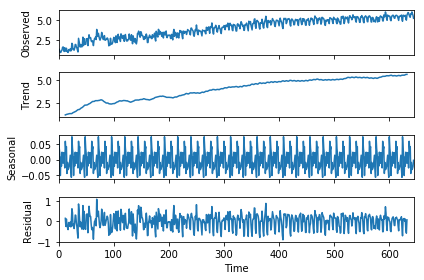

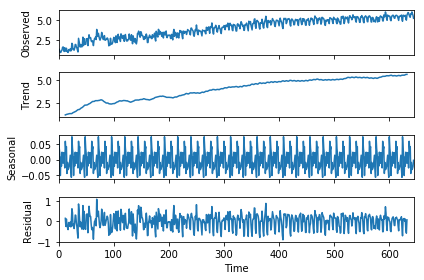

In [103]:
decom= seasonal_decompose(Train_log.values,freq=24)
decom.plot()

We can see the trend, residuals and the seasonality clearly in the above graph. Seasonality shows a constant trend in counter.

In [104]:
trend = decom.trend 
seasonal = decom.seasonal 
residual = decom.resid 

Test Statistic                -9.070278e+00
p-value                        4.320904e-15
#Lags Used                     1.900000e+01
Number of Observations Used    6.010000e+02
Critical Value (1%)           -3.441278e+00
Critical Value (5%)           -2.866361e+00
Critical Value (10%)          -2.569338e+00
dtype: float64


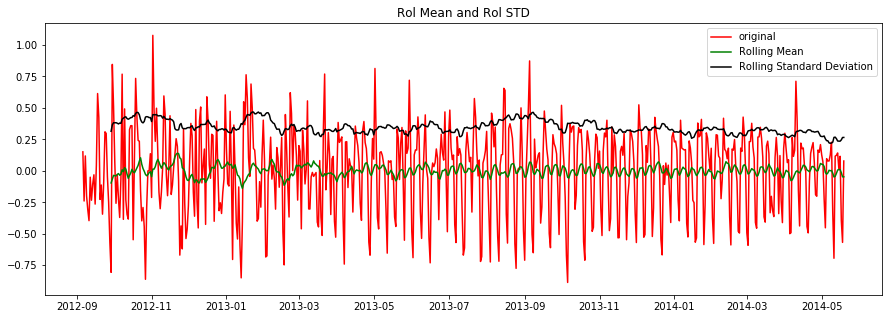

In [106]:
train_log_decompose = pd.DataFrame(residual) 
train_log_decompose['date'] = Train_log.index 
train_log_decompose.set_index('date', inplace = True)
train_log_decompose.dropna(inplace=True) 
check_stationarity(train_log_decompose[0])

In [108]:
kpss_test(train_log_decompose[0])

Test Statistic            0.023515
p-value                   0.100000
Lags Used                19.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


It can be interpreted from the results that the residuals are stationary.

Now we will forecast the time series using different models.

## Forecasting Arima

To find the optimized values of P, D and Q in ARIMA, we will use ACF(Autocorrelation Function) and PACF(Partial Autocorrelation Function) graph.

ACF is a measure of the correlation between the TimeSeries with a lagged version of itself.

PACF measures the correlation between the TimeSeries with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons.

In [109]:
from statsmodels.tsa.stattools import acf, pacf
acf= acf(Train_log_diff.dropna(), nlags=25)
pacf= pacf(Train_log_diff.dropna(), nlags=25)


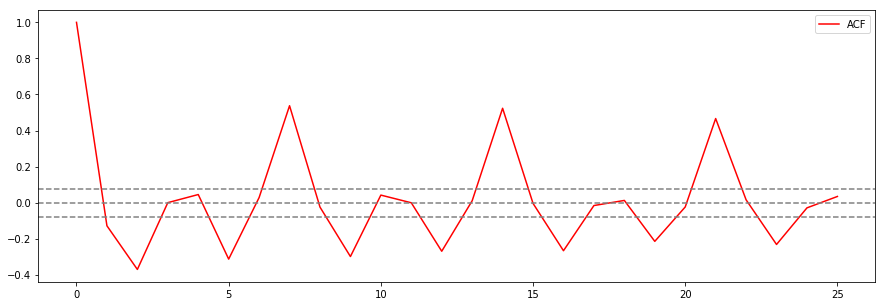

In [110]:
plt.figure(figsize=(15,5))
plt.plot(acf, 'r', label='ACF')
plt.axhline(y=0,linestyle='--',color='gray') # origin
plt.axhline(y=-1.96/np.sqrt(len(Train_log_diff.dropna())),linestyle='--',color='gray') # lower bound
plt.axhline(y=1.96/np.sqrt(len(Train_log_diff.dropna())),linestyle='--',color='gray') # upper bound
plt.legend(loc='best')
plt.show()

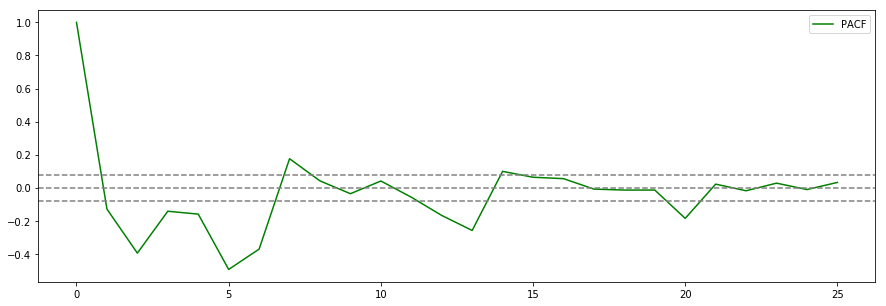

In [111]:
plt.figure(figsize=(15,5))
plt.plot(pacf, 'g', label='PACF')
plt.axhline(y=0,linestyle='--',color='gray') # origin
plt.axhline(y=-1.96/np.sqrt(len(Train_log_diff.dropna())),linestyle='--',color='gray') # lower bound
plt.axhline(y=1.96/np.sqrt(len(Train_log_diff.dropna())),linestyle='--',color='gray') # upper bound
plt.legend(loc='best')
plt.show()

Uper and lower bound are universal values to consider it.

1. p value is the lag value where the PACF chart crosses the upper confidence interval for the first time. It can be noticed that in this case p=1.

2. q value is the lag value where the ACF chart crosses the upper confidence interval for the first time. It can be noticed that in this case q=1.

In [112]:
from statsmodels.tsa.ar_model import AR

In [113]:
ar= AR(training.Count).fit()

In [114]:
pred= ar.predict(start='2014-06-01',end='2014-09-25')

Text(0.5, 1.0, 'RMSE: 72.1518156204334')

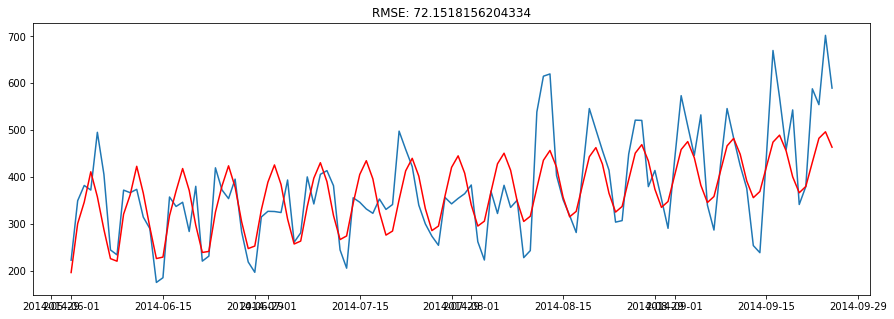

In [115]:
plt.figure(figsize=(15,5))
plt.plot(validation.Count)
plt.plot(pred,'r')
plt.title('RMSE: {}'. format(np.sqrt(mean_squared_error(validation.Count,pred))))

In [116]:
from statsmodels.tsa.arima_model import ARIMA

In [117]:
arima= ARIMA(Train_log,order=(2,1,0)).fit() # Q is o which means it is acting as AR

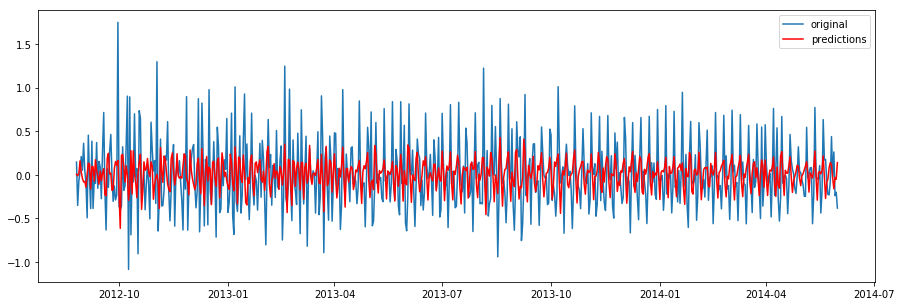

509.1143237262661

In [118]:
plt.figure(figsize=(15,5))
plt.plot(Train_log_diff.dropna(), label='original') 
plt.plot(arima.fittedvalues, color='red', label='predictions') 
plt.legend(loc='best') 
plt.show()
arima.aic

In [119]:
pred= arima.predict(start='2014-06-01',end='2014-09-25')
#These values and validation values are not in same scale so we have to the scaling

Lets plot the validation curve for AR model.

We have to change the scale of the model to the original scale, as we took log of values training and validation data.

First step would be to store the predicted results as a separate series and observe it.


In the first line, we are bringing the scaled predictions to the original scale. As we did the differencing, scale of the values were changes and hence cumsum() and shift() will bring the values to the original scale.

Then, in the second line of code, we are just creating a series of all ones. 

In the next line, we are filling that series with the actual predictions.

Finally, as we took the log of the values previously, here in the last line, i.e. line 4, we are taking the exponential of those values so that we finally get the output in the same scale as required. 

So, basically, in these lines of code, we are just converting our predictions to the original scale. We did two transformations: differencing and log and hence we are first using the cumsum() and shift() to remove the differencing transformation and using the exp() function to remove the log transformation.

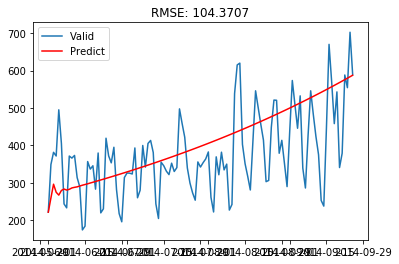

In [120]:
#predicting validation values
AR_predict=arima.predict(start="2014-06-01", end="2014-09-25") #returns series
# taking lag and and making cummulative  sum and filling first value of nan with 0
AR_predict=AR_predict.cumsum().shift().fillna(0) 
# creating a series with size of validation having log  of first value of validation data
AR_predict1=pd.Series(np.ones(validation.shape[0]) * np.log(validation['Count'])[0],index = validation.index) 
# adding the cummulative values and log values
AR_predict1=AR_predict1.add(AR_predict,fill_value=0) 
# taking exponential of values for converting to original scale
AR_predict = np.exp(AR_predict1)
plt.plot(validation['Count'], label = "Valid") 
plt.plot(AR_predict, color = 'red', label = "Predict") 
plt.legend(loc= 'best') 
#np.dot of 1 d array or series multiply each value from both series and take sum of it and we divided it by len of series
# plt.title('RMSE: %.4f'% (np.sqrt(np.dot(AR_predict, validation['Count']))/validation.shape[0]))
plt.title('RMSE: %.4f'% (np.sqrt(mean_squared_error(validation.Count,AR_predict))))
plt.show()

In [121]:
validation.tail(1)

,Count,year,month,day,hour,dow,weekend
Datetime,,,,,,,
2014-09-25,589.666667,2014.0,9.0,25.0,11.5,3.0,0.0


In [122]:
# checking MA model
ma= ARIMA(Train_log, order=(0,1,2)).fit() # p is 0 as its moving average model

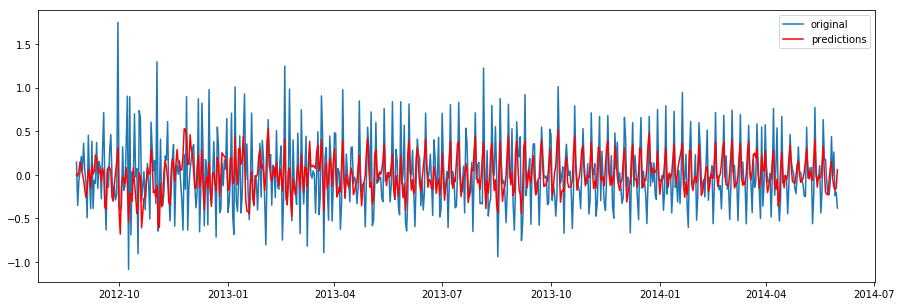

389.00858479781596

In [123]:
plt.figure(figsize=(15,5))
plt.plot(Train_log_diff.dropna(), label='original') 
plt.plot(ma.fittedvalues, color='red', label='predictions') 
plt.legend(loc='best') 
plt.show()
ma.aic

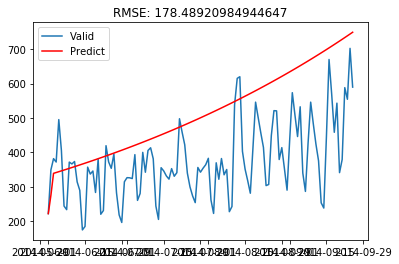

In [124]:
#predicting validation values
AR_predict=ma.predict(start="2014-06-01", end="2014-09-25")
# taking lag and and making cummulative  sum and filling first value of nan with 0
AR_predict=AR_predict.cumsum().shift().fillna(0) 
# creating a series with size of validation having log  of first value of validation data
AR_predict1=pd.Series(np.ones(validation.shape[0]) * np.log(validation['Count'])[0],index = validation.index) 
# adding the cummulative values and log values
AR_predict1=AR_predict1.add(AR_predict,fill_value=0) 
# taking exponential of values for converting to original scale
AR_predict = np.exp(AR_predict1)
plt.plot(validation['Count'], label = "Valid") 
plt.plot(AR_predict, color = 'red', label = "Predict") 
plt.legend(loc= 'best') 
#np.dot of 1 d array or series multiply each value from both series and take sum of it and we divided it by len of series
# plt.title('RMSE: %.4f'% (np.sqrt(np.dot(AR_predict, validation['Count']))/validation.shape[0]))
plt.title('RMSE: {}'.format(np.sqrt(mean_squared_error(validation.Count,AR_predict))))
plt.show()

In [125]:
np.sqrt(mean_squared_error(AR_predict, validation['Count']))

178.48920984944647

In [126]:
# Fitting ARIMA model and getting the right value of P D Q
import itertools
p=d=q=range(0,3)
pdq = list(itertools.product(p,d,q))

for order in pdq:
    try:
        arima = ARIMA(Train_log, order=order).fit()
        print(order,arima.aic)
    except:
        continue

(0, 0, 0) 2124.10603453529
(0, 0, 1) 1475.3455823128202
(0, 0, 2) 1115.760122081359
(0, 1, 0) 624.4687435944836
(0, 1, 1) 513.2621850487972
(0, 1, 2) 389.00858479781596
(0, 2, 0) 1147.470235511734
(0, 2, 1) 632.9004461533584
(1, 0, 0) 615.8897553905631
(1, 0, 1) 528.4867410866686
(1, 0, 2) 409.39034881007865
(1, 1, 0) 615.7351677284726
(1, 1, 1) 433.9183520644003
(1, 1, 2) 390.93002892406844
(1, 2, 0) 1041.98381341082
(2, 0, 0) 610.5719477847874
(2, 0, 1) 454.69685212591094
(2, 0, 2) 411.16325632860116
(2, 1, 0) 509.1143237262661
(2, 1, 1) 383.1995526693802
(2, 1, 2) 383.453846598223
(2, 2, 0) 856.350798062069
(2, 2, 2) 392.8125464831792


In [212]:
a= ARIMA(Train_log, order=(2,1,1))
arima= a.fit(disp=-1)

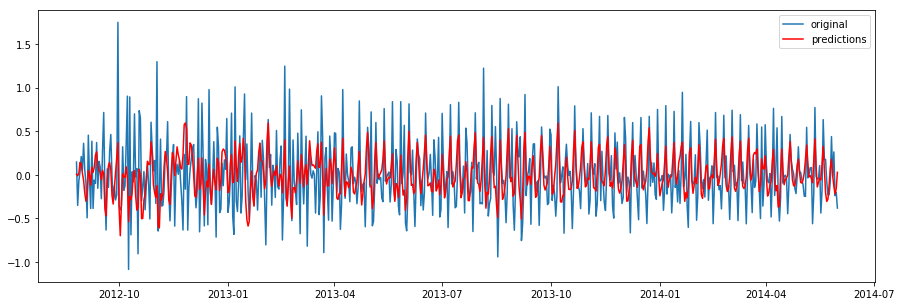

383.1995526693802

In [213]:
plt.figure(figsize=(15,5))
plt.plot(Train_log_diff.dropna(), label='original') 
plt.plot(arima.fittedvalues, color='red', label='predictions') 
plt.legend(loc='best') 
plt.show()
arima.aic

In the first line, we are bringing the scaled predictions to the original scale. As we did the differencing, scale of the values were changes and hence cumsum() and shift() will bring the values to the original scale.

Then, in the second line of code, we are just creating a series of all ones. 

In the next line, we are filling that series with the actual predictions.

Finally, as we took the log of the values previously, here in the last line, i.e. line 4, we are taking the exponential of those values so that we finally get the output in the same scale as required. 

So, basically, in these lines of code, we are just converting our predictions to the original scale. We did two transformations: differencing and log and hence we are first using the cumsum() and shift() to remove the differencing transformation and using the exp() function to remove the log transformation.

In [214]:
def change_scale(pred,valid):
    p1= pred.cumsum().shift().fillna(0)
    p2= pd.Series(np.ones(valid.shape[0])*np.log(valid['Count'][0]), index= valid.index) 
    p2= p2.add(p1, fill_value=0)
    p1= np.exp(p2)
    #Plotting Graph
    plt.figure(figsize=(15,5))
    plt.plot(training.Count,'green', label='Training')
    plt.plot(valid['Count'],'blue', label= 'Valid')
    plt.plot(p1, 'red', label='Predict')
    plt.legend(loc='best')
#     plt.title('RMSE : {}'. format(np.sqrt(np.dot(p1,valid['Count']))/valid.shape[0]))
    plt.title('RMSE: {}'.format(np.sqrt(mean_squared_error(validation.Count,p1))))
    plt.show()

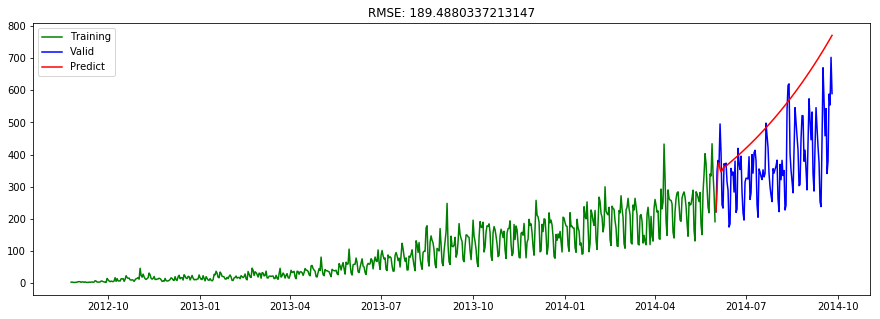

In [215]:
pred= arima.predict(start="2014-06-01", end="2014-09-25")
change_scale(pred,validation)

In [216]:
# Now we will forecast the time series for Test data which starts from 2014-9-26 and ends at 2015-4-26.
# But first we have to change scale and then convert it to hourly

pred=arima.forecast(steps=213)[0]


pred= pd.Series(pred,index= test.index)


p1= pred.cumsum().shift().fillna(0)


p2= pd.Series(np.ones(test.shape[0])*np.log(validation['Count'][-1]), index= test.index) 
p2= p2.add(p1, fill_value=0)


p1= np.exp(p2)

test['prediction']=p1

"""
Note that these are the daily predictions and we need hourly predictions.
So, we will distribute this daily prediction into hourly counts.
we will take the ratio of hourly distribution of passenger count from train data
and then we will distribute the predictions in the same ratio.
"""


# Calculating the hourly ratio of count
train_original['ratio']=train_original['Count']/train_original['Count'].sum() 

# Mapping the hourly ratio with corresponding hours
temp=train_original.groupby(['hour'])['ratio'].sum() 
temp2= pd.DataFrame(temp, columns=['ratio']).reset_index()


# Merge Test and test_original on day, month and year.
# As Test is in days freq and original is on hour, it will map days with their respective hours freq
merge=pd.merge(test, test_original, on=('day','month', 'year'), how='left') 

#Renaming and deleteing duplicates columns
merge['hour']=merge['hour_y'] 
merge=merge.drop(['year', 'month','hour_x','hour_y'], axis=1)

# mapping hourly ratio with hourly freq data
prediction=pd.merge(merge, temp2, on='hour', how='left') 


# Converting the ratio to the original scale 

prediction['Count']=prediction['prediction']*prediction['ratio']*24
prediction['ID']=prediction['ID_y']

# Let’s drop all other features from the submission file and keep ID and Count only.
submission=prediction.drop(['ID_x', 'day', 'ID_y','prediction','hour', 'ratio'],axis=1).reset_index() 

# Converting the final submission to csv format 
pd.DataFrame(submission, columns=['ID','Count']).to_csv('Arima.csv',index=False)

#### SARIMAX or Seasonal Arima

SARIMAX model takes into account the seasonality of the time series.
So we will build a SARIMAX model on the time series.

In [132]:
from statsmodels.tsa.api import SARIMAX

Order in the below model represents the order of the autoregressive model(number of time lags), the degree of differencing(number of times the data have had past values subtracted) and the order of moving average model.

Seasonal order represents the order of the seasonal component of the model for the AR parameters, differences, MA parameters, and periodicity.

In our case the periodicity is 7 since it is daily time series and will repeat after every 7 days.

Trend Elements
There are three trend elements that require configuration.

They are the same as the ARIMA model; specifically:

1. p: Trend autoregression order.
2. d: Trend difference order.
3. q: Trend moving average order.

Seasonal Elements:
There are four seasonal elements that are not part of ARIMA that must be configured; they are:

1. P: Seasonal autoregressive order.
2. D: Seasonal difference order.
3. Q: Seasonal moving average order.
4. m: The number of time steps for a single seasonal period.

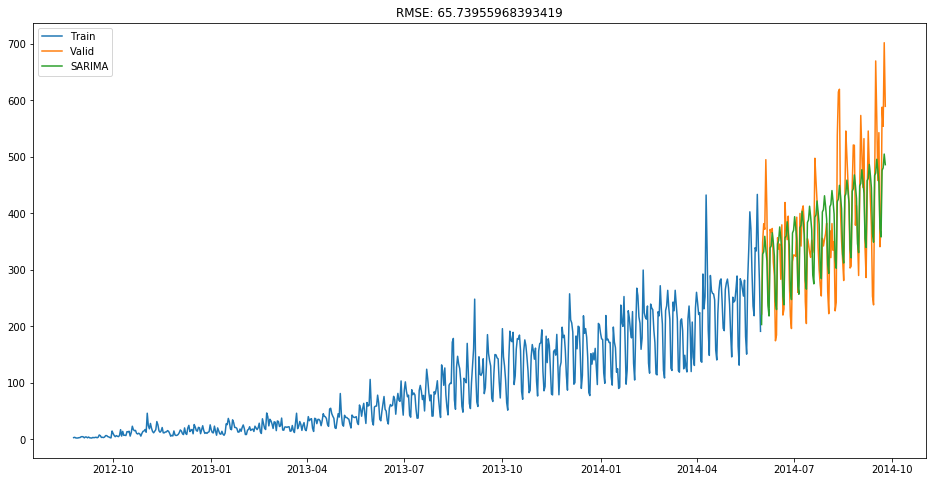

In [133]:
y_hat_avg= validation.copy()
fit1 = SARIMAX(training.Count, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit() 
y_hat_avg['SARIMA'] = fit1.predict(start="2014-6-01", end="2014-9-25", dynamic=True)
plt.figure(figsize=(16,8)) 
plt.plot( training['Count'], label='Train') 
plt.plot(validation['Count'], label='Valid') 
plt.plot(y_hat_avg['SARIMA'], label='SARIMA') 
plt.legend(loc='best') 
plt.title('RMSE: {}'.format(np.sqrt(mean_squared_error(validation.Count, y_hat_avg.SARIMA))))
plt.show()

In [134]:

# Now we will forecast the time series for Test data which starts from 2014-9-26 and ends at 2015-4-26.

predict=fit1.predict(start="2014-9-26", end="2015-4-26", dynamic=True)

# Note that these are the daily predictions and we need hourly predictions. So, we will distribute this daily prediction into hourly counts. To do so, we will take the ratio of hourly distribution of passenger count from train data and then we will distribute the predictions in the same ratio.

test['prediction']=predict
# Calculating the hourly ratio of count
train_original['ratio']=train_original['Count']/train_original['Count'].sum() 

# Mapping the hourly ratio with corresponding hours
temp=train_original.groupby(['hour'])['ratio'].sum() 
temp2= pd.DataFrame(temp, columns=['ratio']).reset_index()
temp2

# Merge Test and test_original on day, month and year.
# As Test is in days freq and original is on hour, it will mappur days with their respective hours freq
merge=pd.merge(test, test_original, on=('day','month', 'year'), how='left') 

#Renaming and deleteing duplicates columns
merge['hour']=merge['hour_y'] 
merge=merge.drop(['year', 'month','hour_x','hour_y'], axis=1)

# mapping hourly ratio with hourly freq data
prediction=pd.merge(merge, temp2, on='hour', how='left') 


# Converting the ratio to the original scale 

prediction['Count']=prediction['prediction']*prediction['ratio']*24
prediction['ID']=prediction['ID_y']

# Let’s drop all other features from the submission file and keep ID and Count only.
submission=prediction.drop(['ID_x', 'day', 'ID_y','prediction','hour', 'ratio'],axis=1).reset_index() 

# Converting the final submission to csv format 
pd.DataFrame(submission, columns=['ID','Count']).to_csv('Sarimax.csv',index=False)


#getting values til 2014-12-30
pd.read_csv('Sarimax.csv').iloc[2300:2315,:]

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/kalman_filter.py:1740: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


,ID,Count
2300,20588,782.504424
2301,20589,730.385081
2302,20590,733.034827
2303,20591,715.707795
2304,20592,674.249560
2305,20593,538.086424
2306,20594,455.386849
2307,20595,376.269884
2308,20596,316.707499
2309,20597,283.505453


https://medium.com/@josemarcialportilla/using-python-and-auto-arima-to-forecast-seasonal-time-series-90877adff03c

#### Auto Arima

Before implementing ARIMA, you need to make the series stationary, and determine the values of p and q using the plots we discussed above. 

If it has seasonality then we use sarimax and have to get seasonal parameters.

Auto ARIMA makes this task really simple for us as it eliminates steps 3 to 6 we saw in the previous section. 

Below are the steps you should follow for implementing auto ARIMA:

1. Load the data: This step will be the same. Load the data into your notebook
2. Preprocessing data: The input should be univariate, hence drop the other columns
3. Fit Auto ARIMA: Fit the model on the univariate series
4. Predict values on validation set: Make predictions on the validation set
5. Calculate RMSE: Check the performance of the model using the predicted values against the actual values


In [135]:
#building the model Using Auto_Arima, 

from pmdarima.arima import auto_arima
model= auto_arima(training.Count, start_p=0, start_q=0,d=1,
                           max_p=4,max_q=4, m=7,
                           start_P=0,D=1,start_Q=0 ,seasonal=True,
                           max_P=4,max_Q=4, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)




Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=6172.297, BIC=6181.210, Fit time=0.038 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=6023.318, BIC=6041.145, Fit time=0.427 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=5785.650, BIC=5803.477, Fit time=0.555 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=5787.074, BIC=5809.358, Fit time=0.613 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=6079.034, BIC=6092.405, Fit time=0.168 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=5787.003, BIC=5809.287, Fit time=1.306 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=5788.897, BIC=5815.637, Fit time=2.845 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=5719.986, BIC=5742.270, Fit time=2.192 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=5864.032, BIC=5881.859, Fit time=0.532 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_o

Auto-ARIMA works by conducting differencing tests (i.e.,
Kwiatkowski–Phillips–Schmidt–Shin, Augmented Dickey-Fuller or
Phillips–Perron) to determine the order of differencing, ``d``, and then
fitting models within ranges of defined ``start_p``, ``max_p``,
``start_q``, ``max_q`` ranges. If the ``seasonal`` optional is enabled,
auto-ARIMA also seeks to identify the optimal ``P`` and ``Q`` hyper-
parameters after conducting the Canova-Hansen to determine the optimal
order of seasonal differencing, ``D``.

In order to find the best model, auto-ARIMA optimizes for a given
``information_criterion``, one of ('aic', 'aicc', 'bic', 'hqic', 'oob')
(Akaike Information Criterion, Corrected Akaike Information Criterion,
Bayesian Information Criterion, Hannan-Quinn Information Criterion, or
"out of bag"--for validation scoring--respectively) and returns the ARIMA
which minimizes the value.

In [141]:
model

ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(1, 1, 2),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(3, 1, 2, 7), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend=None,
   with_intercept=True)

In [142]:
aa=model.fit(training.Count)

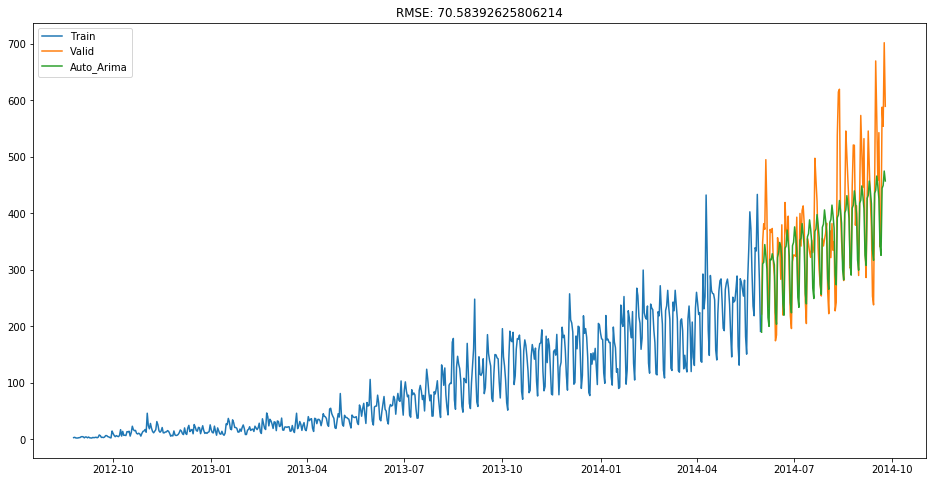

In [143]:
forecast = aa.predict(n_periods=len(validation))
forecast = pd.DataFrame(forecast,index = validation.index, columns=['Prediction'])
# y_hat_avg= pd.concat([validation['Count'],forecast['Prediction']])
plt.figure(figsize=(16,8)) 
plt.plot( training['Count'], label='Train') 
plt.plot(validation['Count'], label='Valid') 
plt.plot(forecast['Prediction'], label='Auto_Arima') 
plt.legend(loc='best') 
plt.title('RMSE: {}'.format(np.sqrt(mean_squared_error(validation.Count, forecast['Prediction']))))
plt.show()

In [144]:
test['pred']= aa.predict(n_periods=len(test))

In [145]:
# Mapping the hourly ratio with corresponding hours
temp=train_original.groupby(['hour'])['ratio'].sum() 
temp2= pd.DataFrame(temp, columns=['ratio']).reset_index()

# Merge Test and test_original on day, month and year.
# As Test is in days freq and original is on hour, it will mappur days with their respective hours freq
merge=pd.merge(test, test_original, on=('day','month', 'year'), how='left') 

#Renaming and deleteing duplicates columns
merge['hour']=merge['hour_y'] 
merge=merge.drop(['year', 'month','hour_x','hour_y'], axis=1)

# mapping hourly ratio with hourly freq data
prediction=pd.merge(merge, temp2, on='hour', how='left') 


# Converting the ratio to the original scale 

prediction['Count']=prediction['pred']*prediction['ratio']*24
prediction['ID']=prediction['ID_y']

# Let’s drop all other features from the submission file and keep ID and Count only.
submission=prediction.drop(['ID_x', 'day', 'ID_y','pred','hour', 'ratio'],axis=1).reset_index() 

# Converting the final submission to csv format 
pd.DataFrame(submission, columns=['ID','Count']).to_csv('Auto_Arima.csv',index=False)


#getting values til 2014-12-30
pd.read_csv('Auto_Arima.csv').iloc[2300:2315,:]

,ID,Count
2300,20588,552.934109
2301,20589,516.105484
2302,20590,517.977850
2303,20591,505.734204
2304,20592,434.195942
2305,20593,346.511077
2306,20594,293.255100
2307,20595,242.306212
2308,20596,203.949871
2309,20597,182.568776
